In [1]:
import tensorflow as tf
import keras

from keras.models import load_model

Using TensorFlow backend.


In [2]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tile_dir = '/efs/data/jpb/flood_mapping/big_dataset/only_flood/tiles/'
label_dir = '/efs/data/jpb/flood_mapping/big_dataset/only_flood/labels/'

In [4]:
model_dir = '/efs/data/jpb/flood_mapping/Edoardo/naive_segmentation/models/xnet_small/'

## Load model

In [5]:
model = load_model(model_dir + 'acc.h5')

## Load test tile

In [6]:
test_names = np.array(pd.read_csv('/efs/data/jpb/flood_mapping/JPB/big_test_undersample_idx_fname.csv')).flatten()

In [7]:
test_tile = Image.open(tile_dir + test_names[0])

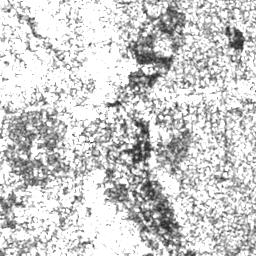

In [8]:
test_tile

In [9]:
test_tile = np.array(test_tile).reshape(-1,256,256,1)

In [10]:
test_label = Image.open(label_dir + test_names[0])

In [11]:
test_label = np.array(test_label)

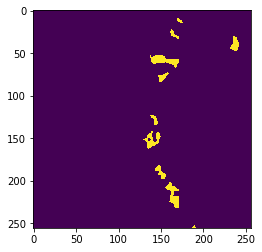

In [13]:
plt.imshow(test_label)

## Test model

In [26]:
test_pred = model.predict(test_tile)

In [29]:
test_pred = test_pred.reshape(256,256,2)

Show flood

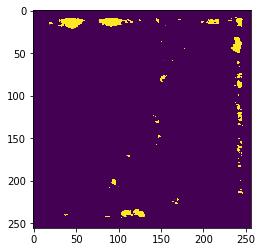

In [38]:
plt.imshow(test_pred[:,:,1])